<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [1]:
!pip install transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2


In [2]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
PATH = '/kaggle/working/arxiv_data.csv'
df = pd.read_csv(PATH)
df

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV']


In [ ]:
#TODO
df.describe()

,titles,summaries,terms
count,51774,51774,51774
unique,38972,38979,3157
top,Transformers in Vision: A Survey,Astounding results from Transformer models on ...,['cs.CV']
freq,7,7,17369


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [ ]:
#TODO
df_shortened = df[:10000]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [4]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [ ]:
#TODO
df_shortened['terms'] = df_shortened['terms'].apply(lambda x: eval(x))
df_shortened.dropna(inplace=True)
df_shortened['category'] = df_shortened['terms'].apply(lambda x: x[0])
df_shortened

/tmp/ipykernel_34/2147707303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shortened['terms'] = df_shortened['terms'].apply(lambda x: eval(x))
/tmp/ipykernel_34/2147707303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shortened.dropna(inplace=True)
/tmp/ipykernel_34/2147707303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,titles,summaries,terms,category
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",cs.CV
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",cs.CV
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",cs.CV
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],cs.CV
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",cs.CV
...,...,...,...,...
9995,Network Signatures from Image Representation o...,We propose a novel subgraph image representati...,"[cs.CV, cs.SI]",cs.CV
9996,Deep Embedding Kernel,"In this paper, we propose a novel supervised l...","[stat.ML, cs.LG]",stat.ML
9997,Plaque Classification in Coronary Arteries fro...,Advanced atherosclerosis in the coronary arter...,[cs.CV],cs.CV
9998,Assessment of Breast Cancer Histology using De...,Breast cancer is the most frequently diagnosed...,[cs.CV],cs.CV


In [ ]:
df_shortened['preprocessed_abstract'] = df_shortened['summaries'].apply(preprocess_text)
df_shortened['preprocessed_title'] = df_shortened['titles'].apply(preprocess_text)
df_shortened

/tmp/ipykernel_34/2536173646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shortened['preprocessed_abstract'] = df_shortened['summaries'].apply(preprocess_text)
/tmp/ipykernel_34/2536173646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shortened['preprocessed_title'] = df_shortened['titles'].apply(preprocess_text)


,titles,summaries,terms,category,preprocessed_abstract,preprocessed_title
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",cs.CV,"[stereo, matching, one, widely, used, techniqu...","[survey, semantic, stereo, matching, semantic,..."
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",cs.CV,"[recent, advancements, artificial, intelligenc...","[future-ai, guiding, principles, consensus, re..."
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",cs.CV,"[paper, proposed, novel, mutual, consistency, ...","[enforcing, mutual, consistency, hard, regions..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],cs.CV,"[consistency, training, proven, advanced, semi...","[parameter, decoupling, strategy, semi-supervi..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",cs.CV,"[ensure, safety, automated, driving, correct, ...","[background-foreground, segmentation, interior..."
...,...,...,...,...,...,...
9995,Network Signatures from Image Representation o...,We propose a novel subgraph image representati...,"[cs.CV, cs.SI]",cs.CV,"[propose, novel, subgraph, image, representati...","[network, signatures, image, representation, a..."
9996,Deep Embedding Kernel,"In this paper, we propose a novel supervised l...","[stat.ML, cs.LG]",stat.ML,"[paper, propose, novel, supervised, learning, ...","[deep, embedding, kernel]"
9997,Plaque Classification in Coronary Arteries fro...,Advanced atherosclerosis in the coronary arter...,[cs.CV],cs.CV,"[advanced, atherosclerosis, coronary, arteries...","[plaque, classification, coronary, arteries, i..."
9998,Assessment of Breast Cancer Histology using De...,Breast cancer is the most frequently diagnosed...,[cs.CV],cs.CV,"[breast, cancer, frequently, diagnosed, cancer...","[assessment, breast, cancer, histology, using,..."


In [ ]:
dataset = df_shortened.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
categories = set([category for category in df_shortened['category']])
categories_map = {category : i for i, category in enumerate(categories)}
dataset['category_number'] = dataset['category'].apply(lambda x: categories_map[x])
labels = dataset['category_number'].to_numpy()
all_titles = [' '.join(x) for x in dataset['preprocessed_title']]
all_abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
all_texts = [all_titles[i] + ' ' + all_abstracts[i] for i in range(len(all_titles))]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
#TODO
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
doc_word_matrix = vectorizer.fit_transform(all_texts)
doc_word_matrix

<10000x28352 sparse matrix of type '<class 'numpy.int64'>'
	with 893206 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(doc_word_matrix, labels, test_size=0.2, random_state=1)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        #TODO
        num_docs, vocab_size = x.shape
        num_classes = len(set(y))
        self.prior = np.zeros(num_classes)
        self.word_counts = np.zeros((num_classes, vocab_size))
        self.lk_word = np.zeros((num_classes, vocab_size))
        
        for c in range(num_classes):
            self.prior[c] = np.sum(y == c) / num_docs
            x_c = x[y == c]
            self.word_counts[c] = np.sum(x_c, axis=0)
            # use log to avoid underflow
            self.lk_word[c] = np.log((self.word_counts[c] + self.alpha) / (np.sum(self.word_counts[c]) + self.alpha * vocab_size))
        
        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        
        #TODO
        num_docs, vocab_size = x.shape
        num_classes = len(self.prior)
        # predict class for each doc
        y_pred = np.zeros(num_docs)
        for i in range(num_docs):
            scores = np.zeros(num_classes)
            for c in range(num_classes):
                scores[c] = 0
                for j in range(vocab_size):
                    if x[i, j] > 0:
                        scores[c] += x[i, j] * self.lk_word[c, j]
                scores[c] += np.log(self.prior[c])
            y_pred[i] = np.argmax(scores)
        return y_pred.astype(int)
    
    def predict_proba(self, x):
        num_docs, vocab_size = x.shape
        num_classes = len(self.prior)
        probabilities = np.zeros((num_docs, num_classes))
        
        for i in range(num_docs):
            scores = np.zeros(num_classes)
            for c in range(num_classes):
                scores[c] = 0
                for j in range(vocab_size):
                    if x[i, j] > 0:
                        scores[c] += x[i, j] * self.lk_word[c, j]
                scores[c] += np.log(self.prior[c])            
            scores -= np.max(scores)  # Subtract the maximum score for numerical stability
            for c in range(num_classes):
                probabilities[i, c] = np.exp(scores[c]) / np.sum(np.exp(scores))
                
        return probabilities

In [ ]:
# use your classifier to fit on the training data
# then try to predict classes of test data

nb = NaiveBayes()
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#TODO
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred, average='macro'))
print('precision: ', precision_score(y_test, y_pred, average='macro'))
print('f1: ', f1_score(y_test, y_pred, average='macro'))

accuracy:  0.875
recall:  0.5986248535150778
precision:  0.7121315449092038
f1:  0.5759530654793096


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

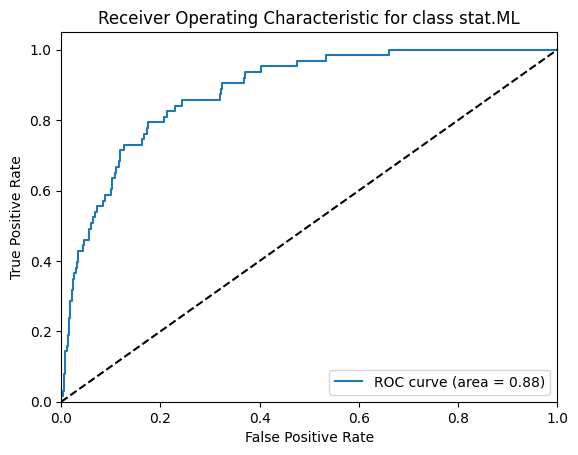

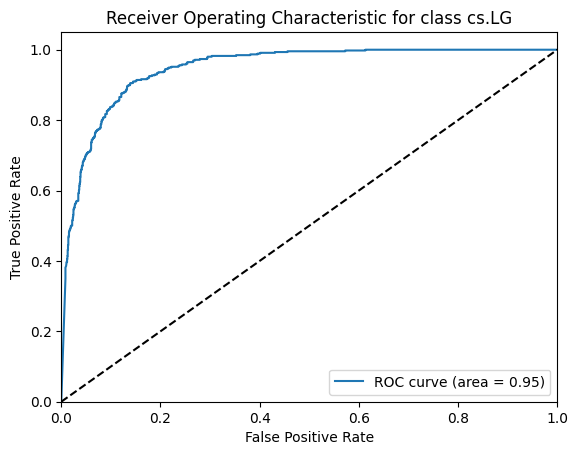

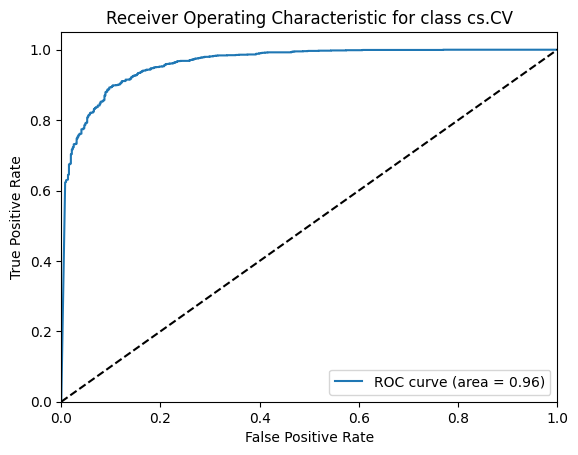

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = nb.predict_proba(X_test.toarray())
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
# Plot ROC curve for each class
for i in range(len(categories)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for key, value in categories_map.items():
        if value == i:
            class_name = key
            break
    plt.title('Receiver Operating Characteristic for class {}'.format(class_name))
    plt.legend(loc="lower right")
    plt.show()


As we know ROC curves plot TPR vs FPR for different classification thresholds.  
A good classifier will have ROC curves that are closer to the top-left corner of the plot, indicating higher true positive rates and lower false positive rates across different thresholds.  
AUC ranges between 0 and 1, where 0.5 represents random predictions and 1 represents perfect classification.  
As we can see class cs.CV has the best performance with auc 0.96. But in general we can say that all three different classes have acceptable performance and overally our classifier has performed well!

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

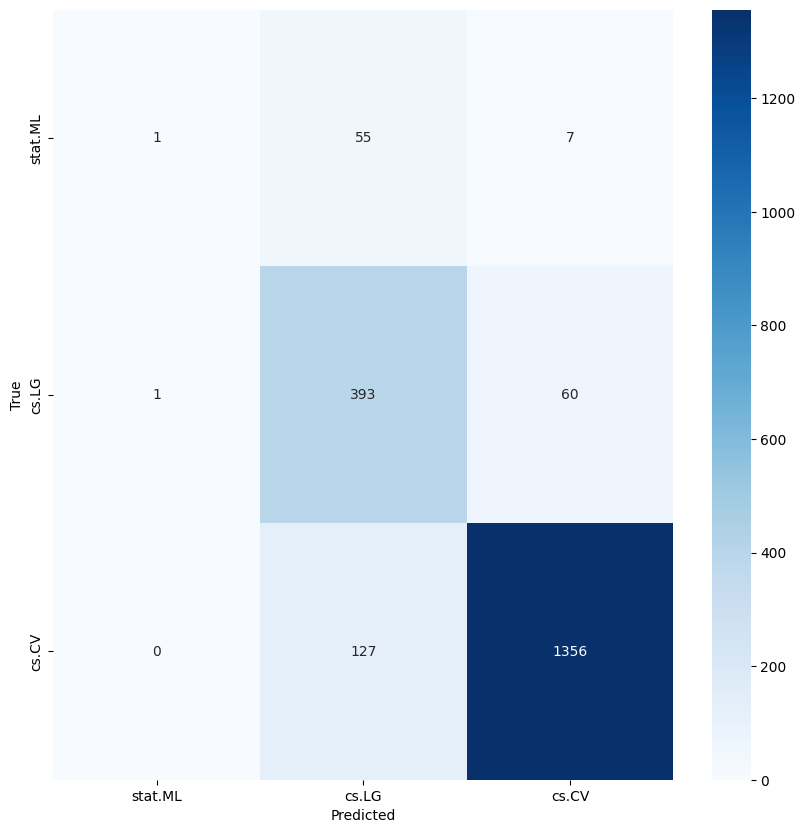

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def confusion_matrix(y_true, y_pred):
    num_classes = len(set(y_true))
    cm = np.zeros((num_classes, num_classes))
    for i in range(len(y_true)):
        cm[y_true[i]][y_pred[i]] += 1
    return cm

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [15]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [16]:
PATH = './arxiv_data.csv'
df = pd.read_csv(PATH)
df['terms'] = df['terms'].apply(lambda x: eval(x))
df.dropna(inplace=True)
df['category'] = df['terms'].apply(lambda x: x[0])

In [17]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [18]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(preprocess_text)
df['preprocessed_title'] = df['titles'].apply(preprocess_text)
preprocessed_total = [df['preprocessed_title'][i] + df['preprocessed_abstract'][i] for i in range(len(df['preprocessed_title']))]

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [19]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        
        with open('FastText_train.txt', 'w', encoding='utf-8') as file:
            file.write('\n'.join(list(map(lambda doc: ' '.join(doc), texts))))
        self.model = fasttext.train_unsupervised('FastText_train.txt', self.method, minn=2, maxn=6, wordNgrams=10,)
        os.remove('FastText_train.txt')

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """

        if self.preprocessor:
            query = self.preprocessor(query)
        if type(query) == str:
            query = query.split(' ')
        tf_idf_embed = tf_idf_vectorizer.transform([' '.join(query)]).toarray()[0]
        weights = []
        vocab_weights_list = [tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]] for word in query if word in tf_idf_vectorizer.vocabulary_]
        min_weight = min(vocab_weights_list) if len(vocab_weights_list) > 0 else 1
        for word in query:
            if word in tf_idf_vectorizer.vocabulary_:
                weight = tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]]
            else:
                weight = min_weight
            weights.append(weight)  
        weights = np.array(weights)
        query_embed = np.mean([self.model.get_word_vector(query[i])* weights[i] for i in range(len(query))], axis=0)
        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [20]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_total, mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

In [21]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8929486870765686, 'covid19'),
 (0.8610905408859253, 'covid-19'),
 (0.8154890537261963, 'dr-covid'),
 (0.7699979543685913, 'pandemic'),
 (0.7678143382072449, 'pandemics'),
 (0.7467730641365051, 'covid-related'),
 (0.7395539879798889, 'coronavirus'),
 (0.7361212372779846, 'infection'),
 (0.7334538102149963, 'outbreak'),
 (0.7315499186515808, 'infectious')]

In [22]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit(list(map(lambda doc: ' '.join(doc), data)))

In [23]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [24]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.1663101 , -0.0176152 ,  0.00846254,  0.07433975, -0.1559986 ,
        0.24881184, -0.08958342,  0.02646786, -0.00839561,  0.04354761,
       -0.0413836 ,  0.16724527,  0.00925082, -0.13738288, -0.10806066,
        0.14277928,  0.14694215,  0.05915069, -0.07178046, -0.13489696,
        0.00974653,  0.04751019, -0.05107797, -0.03718317, -0.05911447,
       -0.08723441,  0.18860003,  0.03346626,  0.14839426,  0.02198651,
       -0.03607312,  0.07212457,  0.00903694, -0.12258419, -0.13263726,
       -0.11517293, -0.11043924,  0.22217172,  0.04949103, -0.02252941,
        0.10266657,  0.14879565,  0.06694811,  0.15695305, -0.18398465,
       -0.06207127, -0.23739673,  0.00345949, -0.00549445,  0.10137758,
        0.31312752, -0.04845698, -0.1416852 ,  0.07192703,  0.47972867,
       -0.07216372, -0.01938435, -0.01492895, -0.05680181,  0.11361442,
       -0.08320227,  0.03592979,  0.03911458,  0.17806119, -0.10762149,
       -0.18108642, -0.1908133 ,  0.01046999,  0.2949984 ,  0.19


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [25]:
# todo
embeddings = [FastText_model.get_query_embedding(' '.join(text), TF_IDF_model.vectorizer) for text in tqdm(preprocessed_total)]

100%|██████████| 51774/51774 [03:42<00:00, 232.31it/s]


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [26]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        # todo
        self.y = labels
        self.embeddings = embeddings
        
    def __len__(self):
        # todo
        return len(self.y)

    def __getitem__(self, i):
        # todo
        return self.embeddings[i], self.y[i]

In [27]:
# todo calculate the labels
dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset.dropna(inplace=True)
categories = set([category for category in df['category']])
categories_map = {category : i for i, category in enumerate(categories)}
dataset['category_number'] = dataset['category'].apply(lambda x: categories_map[x])
labels = dataset['category_number'].to_numpy()

In [28]:
# todo split the data into train, val, test and create dataloaders
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
train_loader = DataLoader(dataset= PapersDataSet(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(dataset= PapersDataSet(X_val, y_val), batch_size=64, shuffle=False)
test_loader = DataLoader(dataset= PapersDataSet(X_test, y_test), batch_size=64, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [35]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        # todo
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 50),
            nn.BatchNorm1d(50),
            nn.LeakyReLU(),
            nn.Linear(50, 30),
            nn.BatchNorm1d(30),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(30, 8),
            nn.BatchNorm1d(8),
            nn.Tanh(), 
            nn.Dropout(p=0.2),
            nn.Linear(8, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        # todo
        return self.seq(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [37]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    # todo
    epoch_true = 0
    epoch_all = 0
    eval_loss = 0
    predicted_labels = []
    true_labels = []
    
    with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (x, label) in pbar:
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)
            loss = criterion(predicted, label)
            eval_loss += loss.item()
            predictions = predicted.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()
            true_labels.extend(label)
            predicted_labels.extend(predictions)
            discription = 'Validation' if not test_mode else 'Test'
            pbar.set_description(f'{discription} Acc: {epoch_true * 100. / epoch_all:.2f}%')

    predicted_labels = [label.item() for label in predicted_labels]
    true_labels = [label.item() for label in true_labels]
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [39]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            # todo
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)
            loss = criterion(predicted, label)
            train_loss += loss.item()
            predictions = predicted.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()
            pbar.set_description(f'Training Acc: {epoch_true * 100. / epoch_all:.2f}%')
            loss.backward()
            optimizer.step()
            optimizer.zero_grad() 
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Training Acc: 36.35%: 100%|██████████| 1295/1295 [00:07<00:00, 168.60it/s]

Validation Acc: 47.38%: 100%|██████████| 81/81 [00:00<00:00, 219.78it/s]


Epoch 1 finished in 8.22s

[Epoch 1]	Train Loss: 0.0346	Validation Loss: 0.0160	 F1 score macro: 0.4158309502896358


Training Acc: 55.48%: 100%|██████████| 1295/1295 [00:07<00:00, 183.37it/s]

Validation Acc: 65.64%: 100%|██████████| 81/81 [00:00<00:00, 237.70it/s]


Epoch 2 finished in 7.54s

[Epoch 2]	Train Loss: 0.0302	Validation Loss: 0.0139	 F1 score macro: 0.541739708266047


Training Acc: 65.81%: 100%|██████████| 1295/1295 [00:07<00:00, 176.10it/s]

Validation Acc: 72.80%: 100%|██████████| 81/81 [00:00<00:00, 215.56it/s]


Epoch 3 finished in 7.90s

[Epoch 3]	Train Loss: 0.0274	Validation Loss: 0.0127	 F1 score macro: 0.5893846863174954


Training Acc: 71.29%: 100%|██████████| 1295/1295 [00:06<00:00, 186.22it/s]

Validation Acc: 76.84%: 100%|██████████| 81/81 [00:00<00:00, 258.12it/s]


Epoch 4 finished in 7.42s

[Epoch 4]	Train Loss: 0.0252	Validation Loss: 0.0116	 F1 score macro: 0.6115329778993513


Training Acc: 75.37%: 100%|██████████| 1295/1295 [00:07<00:00, 172.14it/s]

Validation Acc: 80.99%: 100%|██████████| 81/81 [00:00<00:00, 229.79it/s]


Epoch 5 finished in 8.05s

[Epoch 5]	Train Loss: 0.0235	Validation Loss: 0.0110	 F1 score macro: 0.6238036149950049


Training Acc: 78.36%: 100%|██████████| 1295/1295 [00:07<00:00, 184.95it/s]

Validation Acc: 82.81%: 100%|██████████| 81/81 [00:00<00:00, 85.07it/s]


Epoch 6 finished in 8.09s

[Epoch 6]	Train Loss: 0.0221	Validation Loss: 0.0103	 F1 score macro: 0.6148004750232959


Training Acc: 80.39%: 100%|██████████| 1295/1295 [00:07<00:00, 170.13it/s]

Validation Acc: 83.45%: 100%|██████████| 81/81 [00:00<00:00, 265.57it/s]


Epoch 7 finished in 8.06s

[Epoch 7]	Train Loss: 0.0209	Validation Loss: 0.0096	 F1 score macro: 0.6021018645126909


Training Acc: 81.43%: 100%|██████████| 1295/1295 [00:07<00:00, 182.47it/s]

Validation Acc: 83.77%: 100%|██████████| 81/81 [00:00<00:00, 249.60it/s]


Epoch 8 finished in 7.57s

[Epoch 8]	Train Loss: 0.0198	Validation Loss: 0.0092	 F1 score macro: 0.5947209697020521


Training Acc: 81.99%: 100%|██████████| 1295/1295 [00:07<00:00, 171.03it/s]

Validation Acc: 84.08%: 100%|██████████| 81/81 [00:00<00:00, 232.91it/s]


Epoch 9 finished in 8.06s

[Epoch 9]	Train Loss: 0.0190	Validation Loss: 0.0089	 F1 score macro: 0.5914449874652957


Training Acc: 82.52%: 100%|██████████| 1295/1295 [00:07<00:00, 181.33it/s]

Validation Acc: 84.26%: 100%|██████████| 81/81 [00:00<00:00, 243.55it/s]


Epoch 10 finished in 7.63s

[Epoch 10]	Train Loss: 0.0184	Validation Loss: 0.0085	 F1 score macro: 0.5834108820943353


Training Acc: 82.66%: 100%|██████████| 1295/1295 [00:07<00:00, 165.04it/s]

Validation Acc: 84.49%: 100%|██████████| 81/81 [00:00<00:00, 244.77it/s]


Epoch 11 finished in 8.33s

[Epoch 11]	Train Loss: 0.0178	Validation Loss: 0.0081	 F1 score macro: 0.5881277244218386


Training Acc: 83.02%: 100%|██████████| 1295/1295 [00:07<00:00, 184.35it/s]

Validation Acc: 84.47%: 100%|██████████| 81/81 [00:00<00:00, 249.38it/s]


Epoch 12 finished in 7.49s

[Epoch 12]	Train Loss: 0.0172	Validation Loss: 0.0079	 F1 score macro: 0.5833581231332484


Training Acc: 83.30%: 100%|██████████| 1295/1295 [00:07<00:00, 164.91it/s]

Validation Acc: 84.91%: 100%|██████████| 81/81 [00:00<00:00, 257.25it/s]


Epoch 13 finished in 8.31s

[Epoch 13]	Train Loss: 0.0167	Validation Loss: 0.0077	 F1 score macro: 0.5828169414241465


Training Acc: 83.27%: 100%|██████████| 1295/1295 [00:07<00:00, 180.97it/s]

Validation Acc: 84.70%: 100%|██████████| 81/81 [00:00<00:00, 251.84it/s]


Epoch 14 finished in 7.62s

[Epoch 14]	Train Loss: 0.0164	Validation Loss: 0.0075	 F1 score macro: 0.5827236490633706


Training Acc: 83.48%: 100%|██████████| 1295/1295 [00:07<00:00, 171.55it/s]

Validation Acc: 84.88%: 100%|██████████| 81/81 [00:00<00:00, 248.08it/s]


Epoch 15 finished in 8.01s

[Epoch 15]	Train Loss: 0.0161	Validation Loss: 0.0075	 F1 score macro: 0.5811295240085705


Training Acc: 83.59%: 100%|██████████| 1295/1295 [00:07<00:00, 177.07it/s]

Validation Acc: 84.88%: 100%|██████████| 81/81 [00:00<00:00, 241.37it/s]


Epoch 16 finished in 7.79s

[Epoch 16]	Train Loss: 0.0158	Validation Loss: 0.0072	 F1 score macro: 0.58175767145441


Training Acc: 83.62%: 100%|██████████| 1295/1295 [00:07<00:00, 168.11it/s]

Validation Acc: 85.05%: 100%|██████████| 81/81 [00:00<00:00, 241.04it/s]


Epoch 17 finished in 8.18s

[Epoch 17]	Train Loss: 0.0156	Validation Loss: 0.0071	 F1 score macro: 0.5789479757272865


Training Acc: 83.63%: 100%|██████████| 1295/1295 [00:07<00:00, 180.39it/s]

Validation Acc: 85.13%: 100%|██████████| 81/81 [00:00<00:00, 265.16it/s]


Epoch 18 finished in 7.62s

[Epoch 18]	Train Loss: 0.0154	Validation Loss: 0.0070	 F1 score macro: 0.5822210278600881


Training Acc: 83.63%: 100%|██████████| 1295/1295 [00:07<00:00, 166.77it/s]

Validation Acc: 84.99%: 100%|██████████| 81/81 [00:00<00:00, 252.23it/s]


Epoch 19 finished in 8.23s

[Epoch 19]	Train Loss: 0.0152	Validation Loss: 0.0069	 F1 score macro: 0.5790726743222202


Training Acc: 83.65%: 100%|██████████| 1295/1295 [00:07<00:00, 183.72it/s]

Validation Acc: 85.17%: 100%|██████████| 81/81 [00:00<00:00, 239.25it/s]


Epoch 20 finished in 7.53s

[Epoch 20]	Train Loss: 0.0151	Validation Loss: 0.0068	 F1 score macro: 0.5799973928254194


Training Acc: 83.96%: 100%|██████████| 1295/1295 [00:07<00:00, 170.95it/s]

Validation Acc: 85.13%: 100%|██████████| 81/81 [00:00<00:00, 248.08it/s]


Epoch 21 finished in 8.04s

[Epoch 21]	Train Loss: 0.0148	Validation Loss: 0.0068	 F1 score macro: 0.5796183922670123


Training Acc: 83.81%: 100%|██████████| 1295/1295 [00:07<00:00, 180.93it/s]

Validation Acc: 85.07%: 100%|██████████| 81/81 [00:00<00:00, 244.62it/s]


Epoch 22 finished in 7.63s

[Epoch 22]	Train Loss: 0.0146	Validation Loss: 0.0067	 F1 score macro: 0.5833959777110835


Training Acc: 83.97%: 100%|██████████| 1295/1295 [00:07<00:00, 168.87it/s]

Validation Acc: 85.15%: 100%|██████████| 81/81 [00:00<00:00, 233.17it/s]


Epoch 23 finished in 8.16s

[Epoch 23]	Train Loss: 0.0146	Validation Loss: 0.0067	 F1 score macro: 0.5822512915341503


Training Acc: 83.92%: 100%|██████████| 1295/1295 [00:07<00:00, 180.20it/s]

Validation Acc: 85.13%: 100%|██████████| 81/81 [00:00<00:00, 248.47it/s]


Epoch 24 finished in 7.65s

[Epoch 24]	Train Loss: 0.0145	Validation Loss: 0.0066	 F1 score macro: 0.5798222824836871


Training Acc: 83.93%: 100%|██████████| 1295/1295 [00:07<00:00, 169.38it/s]

Validation Acc: 85.17%: 100%|██████████| 81/81 [00:00<00:00, 266.58it/s]


Epoch 25 finished in 8.09s

[Epoch 25]	Train Loss: 0.0144	Validation Loss: 0.0066	 F1 score macro: 0.5801788406669154


Training Acc: 83.79%: 100%|██████████| 1295/1295 [00:07<00:00, 180.78it/s]

Validation Acc: 85.01%: 100%|██████████| 81/81 [00:00<00:00, 245.54it/s]


Epoch 26 finished in 7.64s

[Epoch 26]	Train Loss: 0.0144	Validation Loss: 0.0065	 F1 score macro: 0.5852597341563083


Training Acc: 84.26%: 100%|██████████| 1295/1295 [00:08<00:00, 158.01it/s]

Validation Acc: 85.22%: 100%|██████████| 81/81 [00:00<00:00, 256.44it/s]


Epoch 27 finished in 8.69s

[Epoch 27]	Train Loss: 0.0142	Validation Loss: 0.0066	 F1 score macro: 0.5835552156962757


Training Acc: 84.27%: 100%|██████████| 1295/1295 [00:07<00:00, 168.37it/s]

Validation Acc: 85.30%: 100%|██████████| 81/81 [00:00<00:00, 224.25it/s]


Epoch 28 finished in 8.19s

[Epoch 28]	Train Loss: 0.0140	Validation Loss: 0.0065	 F1 score macro: 0.5878430290926494


Training Acc: 84.07%: 100%|██████████| 1295/1295 [00:08<00:00, 160.82it/s]

Validation Acc: 85.15%: 100%|██████████| 81/81 [00:00<00:00, 228.05it/s]


Epoch 29 finished in 8.62s

[Epoch 29]	Train Loss: 0.0141	Validation Loss: 0.0064	 F1 score macro: 0.586645933142512


Training Acc: 84.29%: 100%|██████████| 1295/1295 [00:08<00:00, 161.87it/s]

Validation Acc: 85.17%: 100%|██████████| 81/81 [00:00<00:00, 232.17it/s]


Epoch 30 finished in 8.51s

[Epoch 30]	Train Loss: 0.0139	Validation Loss: 0.0064	 F1 score macro: 0.5866431389896548


Training Acc: 84.24%: 100%|██████████| 1295/1295 [00:08<00:00, 158.89it/s]

Validation Acc: 85.36%: 100%|██████████| 81/81 [00:00<00:00, 254.72it/s]


Epoch 31 finished in 8.65s

[Epoch 31]	Train Loss: 0.0139	Validation Loss: 0.0064	 F1 score macro: 0.5883827687712979


Training Acc: 84.38%: 100%|██████████| 1295/1295 [00:07<00:00, 164.69it/s]

Validation Acc: 85.20%: 100%|██████████| 81/81 [00:01<00:00, 80.28it/s]


Epoch 32 finished in 9.07s

[Epoch 32]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.5933297755364156


Training Acc: 84.40%: 100%|██████████| 1295/1295 [00:08<00:00, 159.68it/s]

Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 233.27it/s]


Epoch 33 finished in 8.63s

[Epoch 33]	Train Loss: 0.0138	Validation Loss: 0.0064	 F1 score macro: 0.5886380760318389


Training Acc: 84.33%: 100%|██████████| 1295/1295 [00:07<00:00, 174.79it/s]

Validation Acc: 84.93%: 100%|██████████| 81/81 [00:00<00:00, 251.41it/s]


Epoch 34 finished in 7.90s

[Epoch 34]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.5905530195821906


Training Acc: 84.30%: 100%|██████████| 1295/1295 [00:07<00:00, 163.32it/s]

Validation Acc: 85.36%: 100%|██████████| 81/81 [00:00<00:00, 221.05it/s]


Epoch 35 finished in 8.44s

[Epoch 35]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.6030883825524949


Training Acc: 84.37%: 100%|██████████| 1295/1295 [00:07<00:00, 172.92it/s]

Validation Acc: 85.20%: 100%|██████████| 81/81 [00:00<00:00, 261.73it/s]


Epoch 36 finished in 7.97s

[Epoch 36]	Train Loss: 0.0136	Validation Loss: 0.0063	 F1 score macro: 0.5985829340791172


Training Acc: 84.35%: 100%|██████████| 1295/1295 [00:08<00:00, 161.56it/s]

Validation Acc: 85.49%: 100%|██████████| 81/81 [00:00<00:00, 246.98it/s]


Epoch 37 finished in 8.49s

[Epoch 37]	Train Loss: 0.0136	Validation Loss: 0.0063	 F1 score macro: 0.6023090641535049


Training Acc: 84.40%: 100%|██████████| 1295/1295 [00:07<00:00, 175.31it/s]

Validation Acc: 85.20%: 100%|██████████| 81/81 [00:00<00:00, 241.93it/s]


Epoch 38 finished in 7.89s

[Epoch 38]	Train Loss: 0.0135	Validation Loss: 0.0062	 F1 score macro: 0.6064239594742168


Training Acc: 84.30%: 100%|██████████| 1295/1295 [00:07<00:00, 162.03it/s]

Validation Acc: 85.09%: 100%|██████████| 81/81 [00:00<00:00, 251.72it/s]


Epoch 39 finished in 8.47s

[Epoch 39]	Train Loss: 0.0135	Validation Loss: 0.0062	 F1 score macro: 0.5998443123328183


Training Acc: 84.48%: 100%|██████████| 1295/1295 [00:07<00:00, 169.25it/s]

Validation Acc: 85.36%: 100%|██████████| 81/81 [00:00<00:00, 232.52it/s]


Epoch 40 finished in 8.22s

[Epoch 40]	Train Loss: 0.0134	Validation Loss: 0.0062	 F1 score macro: 0.6024830145728033


Training Acc: 84.33%: 100%|██████████| 1295/1295 [00:07<00:00, 163.93it/s]

Validation Acc: 85.32%: 100%|██████████| 81/81 [00:00<00:00, 244.18it/s]


Epoch 41 finished in 8.39s

[Epoch 41]	Train Loss: 0.0134	Validation Loss: 0.0061	 F1 score macro: 0.5981262963900926


Training Acc: 84.51%: 100%|██████████| 1295/1295 [00:07<00:00, 170.99it/s]

Validation Acc: 85.28%: 100%|██████████| 81/81 [00:00<00:00, 266.84it/s]


Epoch 42 finished in 8.06s

[Epoch 42]	Train Loss: 0.0133	Validation Loss: 0.0063	 F1 score macro: 0.5929562217729333


Training Acc: 84.60%: 100%|██████████| 1295/1295 [00:07<00:00, 164.34it/s]

Validation Acc: 85.51%: 100%|██████████| 81/81 [00:00<00:00, 235.24it/s]


Epoch 43 finished in 8.42s

[Epoch 43]	Train Loss: 0.0132	Validation Loss: 0.0062	 F1 score macro: 0.5963014417722952


Training Acc: 84.40%: 100%|██████████| 1295/1295 [00:07<00:00, 172.58it/s]

Validation Acc: 85.44%: 100%|██████████| 81/81 [00:00<00:00, 276.01it/s]


Epoch 44 finished in 7.97s

[Epoch 44]	Train Loss: 0.0132	Validation Loss: 0.0061	 F1 score macro: 0.6032040346386248


Training Acc: 84.39%: 100%|██████████| 1295/1295 [00:08<00:00, 160.79it/s]

Validation Acc: 85.55%: 100%|██████████| 81/81 [00:00<00:00, 236.34it/s]


Epoch 45 finished in 8.58s

[Epoch 45]	Train Loss: 0.0133	Validation Loss: 0.0061	 F1 score macro: 0.6097954264706438


Training Acc: 84.46%: 100%|██████████| 1295/1295 [00:07<00:00, 173.90it/s]

Validation Acc: 85.18%: 100%|██████████| 81/81 [00:00<00:00, 246.97it/s]


Epoch 46 finished in 7.96s

[Epoch 46]	Train Loss: 0.0132	Validation Loss: 0.0061	 F1 score macro: 0.6041940926319932


Training Acc: 84.33%: 100%|██████████| 1295/1295 [00:07<00:00, 163.55it/s]

Validation Acc: 85.59%: 100%|██████████| 81/81 [00:00<00:00, 232.57it/s]


Epoch 47 finished in 8.42s

[Epoch 47]	Train Loss: 0.0133	Validation Loss: 0.0061	 F1 score macro: 0.6102343590760827


Training Acc: 84.25%: 100%|██████████| 1295/1295 [00:07<00:00, 169.95it/s]

Validation Acc: 85.09%: 100%|██████████| 81/81 [00:00<00:00, 226.72it/s]


Epoch 48 finished in 8.21s

[Epoch 48]	Train Loss: 0.0133	Validation Loss: 0.0062	 F1 score macro: 0.6126358605105487


Training Acc: 84.58%: 100%|██████████| 1295/1295 [00:07<00:00, 162.92it/s]

Validation Acc: 85.26%: 100%|██████████| 81/81 [00:00<00:00, 250.66it/s]


Epoch 49 finished in 8.42s

[Epoch 49]	Train Loss: 0.0130	Validation Loss: 0.0062	 F1 score macro: 0.6069712650931886


Training Acc: 84.55%: 100%|██████████| 1295/1295 [00:07<00:00, 171.32it/s]

Validation Acc: 85.55%: 100%|██████████| 81/81 [00:00<00:00, 218.91it/s]


Epoch 50 finished in 8.13s

[Epoch 50]	Train Loss: 0.0131	Validation Loss: 0.0061	 F1 score macro: 0.6059418482499648


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

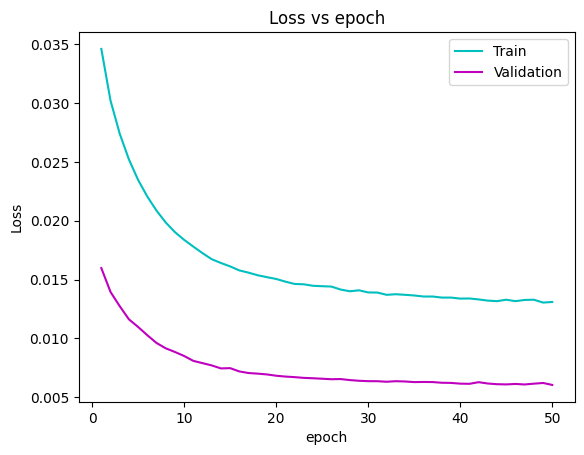

In [44]:
# todo: plot the train and validation loss by epoch
epoch_list = [i + 1 for i in range(num_epochs)]
plt.plot(epoch_list, train_loss_arr, color='c', label='Train')
plt.plot(epoch_list, val_loss_arr, color='m', label='Validation')
plt.title('Loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()   

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

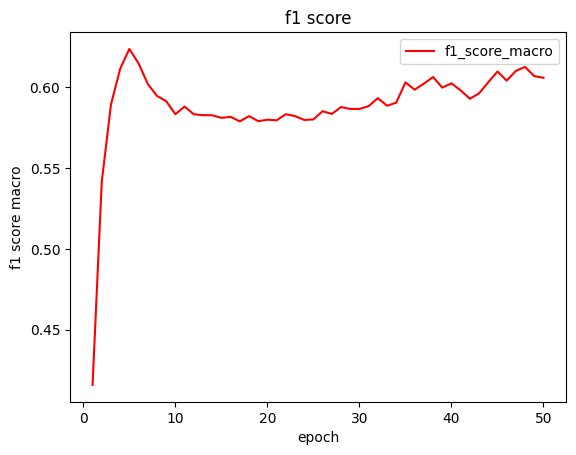

In [45]:
# todo: plot the f1 score by epoch 
epoch_list = [i + 1 for i in range(num_epochs)]
plt.plot(epoch_list, f1_macro_scores, color='r', label='f1_score_macro')
plt.title('f1 score')
plt.ylabel('f1 score macro')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show() 

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [47]:
# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
print(f'Loss: {eval_loss / len(test_loader.dataset)}')

Test Acc: 85.98%: 100%|██████████| 81/81 [00:00<00:00, 232.82it/s]


Loss: 0.005941624034091099


In [48]:
print(f"Accurracy: {round(accuracy_score(true_labels, predicted_labels), 3)}")

f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1-Macro: {round(f1_macro, 3)}\n")

f1_micro = f1_score(true_labels, predicted_labels, average='micro')
print(f"F1-Micro: {round(f1_micro, 3)}\n")

class_to_category_map = {v:k for k,v in categories_map.items()}
confusion_matrix = confusion_matrix(true_labels, predicted_labels, labels=[i for i in range(3)])
confusion_matrix_df = pd.DataFrame(confusion_matrix).rename(columns=class_to_category_map, index=class_to_category_map)
display(confusion_matrix_df)

Accurracy: 0.86

F1-Macro: 0.616



F1-Micro: 0.86




,stat.ML,cs.LG,cs.CV
stat.ML,14,261,26
cs.LG,15,1897,200
cs.CV,3,221,2541


In [49]:
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
print(f"Macro-average precision: {round(precision, 2)}")
print(f"Macro-average recall: {round(recall, 2)}")
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
print(f"Micro-average precision: {round(precision, 2)}")
print(f"Micro-average recall: {round(recall, 2)}")

Macro-average precision: 0.72

Macro-average recall: 0.62

Micro-average precision: 0.86

Micro-average recall: 0.86


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [50]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    output = model(torch.from_numpy(embedding).to(device).unsqueeze(0))
    predicted_class_number = output.argmax(-1).item()
    predicted_class_name = class_to_category_map[predicted_class_number]
    return predicted_class_name

In [51]:
predict('hardware and computerc architecture is good')

'cs.LG'

In [52]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [12]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [10]:
# read data
PATH = '/kaggle/working/arxiv_data.csv'
df = pd.read_csv(PATH)

In [11]:
# perform data cleaning and eda (you can add cells here)
# todo
df['terms'] = df['terms'].apply(lambda x: eval(x))
df.dropna(inplace=True)
df['category'] = df['terms'].apply(lambda x: x[0])

In [12]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    # todo
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [13]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(preprocess_text)
df['preprocessed_title'] = df['titles'].apply(preprocess_text)
df

,titles,summaries,terms,category,preprocessed_abstract,preprocessed_title
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",cs.CV,"[stereo, matching, one, widely, used, techniqu...","[survey, semantic, stereo, matching, semantic,..."
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",cs.CV,"[recent, advancements, artificial, intelligenc...","[future-ai, guiding, principles, consensus, re..."
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",cs.CV,"[paper, proposed, novel, mutual, consistency, ...","[enforcing, mutual, consistency, hard, regions..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],cs.CV,"[consistency, training, proven, advanced, semi...","[parameter, decoupling, strategy, semi-supervi..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",cs.CV,"[ensure, safety, automated, driving, correct, ...","[background-foreground, segmentation, interior..."
...,...,...,...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"[stat.ML, physics.bio-ph, q-bio.QM]",stat.ML,"[address, problem, analyzing, sets, noisy, tim...","[hierarchically-coupled, hidden, markov, model..."
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"[cs.CV, cs.DM]",cs.CV,"[discuss, method, tracking, individual, molecu...","[blinking, molecule, tracking]"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"[stat.ML, cs.LG, q-bio.GN]",stat.ML,"[attempt, set, mathematical, foundation, immun...","[towards, mathematical, foundation, immunology..."
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,[cs.CV],cs.CV,"[diffusion, tensor, imaging, dti, allows, esti...","[semi-automatic, graph-based, approach, determ..."


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [14]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test
dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset.dropna(inplace=True)
categories = set([category for category in df['category']])
categories_map = {category : i for i, category in enumerate(categories)}
dataset['category_number'] = dataset['category'].apply(lambda x: categories_map[x])
dataset = dataset.sample(n=10000, random_state=1)
labels = dataset['category_number'].to_numpy()
all_titles = [' '.join(x) for x in dataset['preprocessed_title']]
all_abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
all_texts = [all_titles[i] + ' ' + all_abstracts[i] for i in range(len(all_titles))]
X_train, X_test, y_train, y_test = train_test_split(all_texts, labels, test_size=0.2, random_state=1)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [15]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# todo 
# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(categories)).to(device)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# i will define model 2 in the next cells

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [16]:
# todo
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [17]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(value[idx]) for key, value in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

In [11]:
# todo
# fine tune bert and train model
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=5,            
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs',            
    logging_steps=10,
)

trainer = Trainer(
    model=model,                      
    args=training_args,                  
    train_dataset=train_dataset,         
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  warnings.warn(


Step,Training Loss
10,0.993200
20,0.911500
30,0.864400
40,0.876000
50,0.852700
60,0.883000
70,0.803100
80,0.772200
90,0.607900
100,0.551600


TrainOutput(global_step=2500, training_loss=0.27554184984564783, metrics={'train_runtime': 3288.3321, 'train_samples_per_second': 12.164, 'train_steps_per_second': 0.76, 'total_flos': 9250081092000000.0, 'train_loss': 0.27554184984564783, 'epoch': 5.0})

In [18]:
# todo
# freeze bert weights and then train model_2
MODEL_2_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# todo 
# you can add more cells here if you need
model_2 = BertForSequenceClassification.from_pretrained(MODEL_2_NAME, num_labels=len(categories)).to(device)
tokenizer = BertTokenizer.from_pretrained(MODEL_2_NAME)
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=5,            
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,                
    weight_decay=0.01,               
    logging_dir='./logs',            
    logging_steps=10,
)

for name, param in model_2.named_parameters():
    if 'classifier' not in name: # classifier layer
        param.requires_grad = False

trainer = Trainer(
    model=model_2,                      
    args=training_args,                  
    train_dataset=train_dataset,         
)

trainer.train()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
10,0.992600
20,0.999400
30,0.994500
40,1.005900
50,1.001600
60,0.972600
70,0.975600
80,0.977300
90,0.946300
100,0.934600


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=1250, training_loss=0.8510273582458496, metrics={'train_runtime': 1208.955, 'train_samples_per_second': 33.086, 'train_steps_per_second': 1.034, 'total_flos': 9250081092000000.0, 'train_loss': 0.8510273582458496, 'epoch': 5.0})

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [12]:
# you can add more cells here if you need
# todo
y_pred_transformers = []
for x in tqdm(X_test):
    _input = tokenizer(x, truncation=True, padding=True, return_tensors='pt').to(device)
    output = model(**_input)
    y_pred_transformers.append(output[0].softmax(1).argmax().item())

100%|██████████| 2000/2000 [00:49<00:00, 40.17it/s]


In [13]:
print(f"model_1 Accurracy: {round(accuracy_score(y_test, y_pred_transformers), 3)}\n")

f1_macro = f1_score(y_test, y_pred_transformers, average='macro')
print(f"model_1 F1-Macro: {round(f1_macro, 3)}\n")

f1_micro = f1_score(y_test, y_pred_transformers, average='micro')
print(f"model_1 F1-Micro: {round(f1_micro, 3)}\n")

class_to_category_map = {v:k for k,v in categories_map.items()}

confusion_matrix = confusion_matrix(y_test, y_pred_transformers, labels=[i for i in range(3)])
confusion_matrix_df = pd.DataFrame(confusion_matrix).rename(columns=class_to_category_map, index=class_to_category_map)
display(confusion_matrix_df)

model_1 Accurracy: 0.87



model_1 F1-Macro: 0.694



model_1 F1-Micro: 0.87




,cs.LG,stat.ML,cs.CV
cs.LG,721,27,70
stat.ML,81,26,12
cs.CV,71,0,992


In [14]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers, average='macro')
print(f"model_1 Macro-average precision: {round(precision, 2)}")
print(f"model_1 Macro-average recall: {round(recall, 2)}")
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers, average='micro')
print(f"model_1 Micro-average precision: {round(precision, 2)}")
print(f"model_1 Micro-average recall: {round(recall, 2)}")

model_1 Macro-average precision: 0.75

model_1 Macro-average recall: 0.68

model_1 Micro-average precision: 0.87

model_1 Micro-average recall: 0.87


In [19]:
y_pred_transformers_2 = []
for x in tqdm(X_test):
    _input = tokenizer(x, truncation=True, padding=True, return_tensors='pt').to(device)
    output = model_2(**_input)
    y_pred_transformers_2.append(output[0].softmax(1).argmax().item())

100%|██████████| 2000/2000 [00:44<00:00, 44.83it/s]


In [20]:
print(f"model_2 Accurracy: {round(accuracy_score(y_test, y_pred_transformers_2), 3)}\n")

f1_macro = f1_score(y_test, y_pred_transformers_2, average='macro')
print(f"model_2 F1-Macro: {round(f1_macro, 3)}\n")

f1_micro = f1_score(y_test, y_pred_transformers_2, average='micro')
print(f"model_2 F1-Micro: {round(f1_micro, 3)}\n")

class_to_category_map = {v:k for k,v in categories_map.items()}

confusion_matrix = confusion_matrix(y_test, y_pred_transformers_2, labels=[i for i in range(3)])
confusion_matrix_df = pd.DataFrame(confusion_matrix).rename(columns=class_to_category_map, index=class_to_category_map)
display(confusion_matrix_df)

model_2 Accurracy: 0.582

model_2 F1-Macro: 0.349

model_2 F1-Micro: 0.582



,cs.LG,cs.CV,stat.ML
cs.LG,190,628,0
cs.CV,88,975,0
stat.ML,20,99,0


In [21]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers_2, average='macro')
print(f"model_2 Macro-average precision: {round(precision, 2)}")
print(f"model_2 Macro-average recall: {round(recall, 2)}")
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_transformers_2, average='micro')
print(f"model_2 Micro-average precision: {round(precision, 2)}")
print(f"model_2 Micro-average recall: {round(recall, 2)}")

model_2 Macro-average precision: 0.4
model_2 Macro-average recall: 0.38
model_2 Micro-average precision: 0.58
model_2 Micro-average recall: 0.58


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
    همانطور که انتظار می‌رفت مدل اول بهتر عمل کرده است زیرا وزن‌های آن فریز نشده است و انعطاف بیش‌تری از خود دز طول زمان آموزش نشان می‌دهد و می‌تواند الگوهایی که ممکن است در لایه‌های پایین‌تر موجود باشد را نیز کشف کند.  
    اگر وزن‌ها را فریز کنیم ممکن است حین fine-tuning دانش pre-trained که از لایه‌های دیگر داشتیم را فراموش کنیم که با آپدیت کردن تمام وزن‌های مدل می‌توان از این اتفاق جلوگیری کرد.  
    در مورد مقایسه مدل اول و fasttext نیز همانطور که مشاهده می‌شود تفاوت آنچنانی وجود ندارد ولی مدل اول که BERT می‌باشد کمی بهتر عمل کرده است. به طور کلی BERT در زمینه contextual information قوی‌تر عمل می‌کند ولی fasttext در کل مدل ساده‌تری می‌باشد و در زمینه out-of-vocabulary words بهتر عمل می‌کند.  
    معمولا در داده‌های حجیم‌تر و با پیچیدگی بالاتر از BERT استفاده می‌شود ولی بسته به شرایط ممکن است هر یک از این دو مدل از خود عملکرد بهتری نشان بدهند.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [15]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """

    preprocessed_query = ' '.join(preprocess_text(x))
    _input = tokenizer(preprocessed_query, truncation=True, padding=True, return_tensors='pt').to(device)
    output = model(**_input)
    predicted_class_number = output[0].softmax(1).argmax().item()
    predicted_class_name = class_to_category_map[predicted_class_number]
    return predicted_class_name

In [16]:
predict('hardware is very good.', model)

'cs.LG'

In [17]:
# It is highly recommended to save your final models
# todo
torch.save(model.state_dict(), 'model.pt')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [161]:
PATH = '/kaggle/working/arxiv_data.csv'
df = pd.read_csv(PATH)
sample_size = 10000
df = df.sample(n=sample_size, random_state=1)
df['terms'] = df['terms'].apply(lambda x: eval(x))
df.dropna(inplace=True)
df['category'] = df['terms'].apply(lambda x: x[0])
df['preprocessed_abstract'] = df['summaries'].apply(preprocess_text)
df['preprocessed_title'] = df['titles'].apply(preprocess_text)
dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset.dropna(inplace=True)
categories = set([category for category in df['category']])
categories_map = {category : i for i, category in enumerate(categories)}
dataset['category_number'] = dataset['category'].apply(lambda x: categories_map[x])
labels = dataset['category_number'].to_numpy()
all_titles = [' '.join(x) for x in dataset['preprocessed_title']]
all_abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
all_texts = [all_titles[i] + ' ' + all_abstracts[i] for i in range(len(all_titles))]

In [160]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.positions = []
        
class PositionalIndex:
    def __init__(self):
        self.root = TrieNode()

    def add(self, token, doc_id, position, is_title):
        node = self.root
        for char in token:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.positions.append((doc_id, position, is_title))

    def remove(self, doc_id):
        def remove_helper(node, doc_id):
            if not node:
                return
            for child in node.children.values():
                remove_helper(child, doc_id)
            node.positions = [pos for pos in node.positions if pos[0] != doc_id]
        remove_helper(self.root, doc_id)


In [165]:
def construct_positional_indexes(all_titles, all_abstracts):
    """
    Get processed data and insert words in that into a trie and construct postional_index and posting lists after wards.

    Parameters
    ----------
    corpus: str
        processed data 

    Return
    ----------
    docs: 
        list of docs with specificied id, title, abstract.
    """
    index = PositionalIndex()
    for i in range(len(dataset)):
        title = all_titles[i]
        abstract = all_abstracts[i]
        for j in range(len(title)):
            index.add(title[j], i, j, True)
        for j in range(len(abstract)):
            index.add(abstract[j], i, j, False)
    return index


index = construct_positional_indexes(all_titles, all_abstracts)

In [ ]:
# we consider we will only use ltn-lnn method.

In [ ]:
def find_related_docs(category):
    if category == 'all':
        return dataset
    else: 
        return dataset[dataset['category'] == category]

In [ ]:
def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, print=False, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    # TODO: retun top 'max_result_count' documents for your searched query
    
    related_docs = find_related_docs(category)

In [ ]:
def ltn_lnn(title_query, abstract_query, max_result_count, weight, print_snippet):
    title_scores = {}
    abstract_scores = {}
    for query_word in title_query.split():
        title_query = title_query.replace(query_word, correct_text(query_word))
    title_query_tokens = clean_data(title_query)
    for token in title_query_tokens:
        posting_list = get_posting_list(token)
        for doc_id, positions in posting_list.items():
            if positions['title'] != []:
                if doc_id not in title_scores:
                    title_scores[doc_id] = 0
                tf = 1 + math.log(len(positions['title']), 10)
                idf = math.log(len(docs) / len(posting_list), 10)
                document_score = tf * idf
                query_score = 1 + math.log(title_query_tokens.count(token), 10)
                title_scores[doc_id] += document_score * query_score
    
    for query_word in abstract_query.split():
        abstract_query = abstract_query.replace(query_word, correct_text(query_word))
    abstract_query_tokens = clean_data(abstract_query)
    for token in abstract_query_tokens:
        posting_list = get_posting_list(token)
        for doc_id, positions in posting_list.items():
            if positions['abstract'] != []:
                if doc_id not in abstract_scores:
                    abstract_scores[doc_id] = 0
                tf = 1 + math.log(len(positions['abstract']), 10)
                idf = math.log(len(docs) / len(posting_list), 10)
                document_score = tf * idf
                query_score = 1 + \
                    math.log(abstract_query_tokens.count(token), 10)
                abstract_scores[doc_id] += document_score * query_score
    scores = {}
    for doc_id in set(title_scores.keys()).union(set(abstract_scores.keys())):
        title_score = title_scores.get(doc_id, 0)
        abstract_score = abstract_scores.get(doc_id, 0)
        final_score = weight * abstract_score + (1 - weight) * title_score
        scores[doc_id] = final_score
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    if max_result_count == -1:
        max_result_count = len(scores)
    top_results = scores[:max_result_count]
    if print_snippet:
        for doc_id, score in top_results:
            print("id: ", doc_id)
            print("Title: ", df[df['paperId'] == doc_id]['title'].values[0][:50])
            print("Abstract: ", df[df['paperId'] == doc_id]['abstract'].values[0][:50])
            print("*******************")
            
    return top_results


<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [5]:
PATH = '/kaggle/working/arxiv_data.csv'
df = pd.read_csv(PATH)
sample_size = 10000
df = df.sample(n=sample_size, random_state=1)
df['terms'] = df['terms'].apply(lambda x: eval(x))
df.dropna(inplace=True)
df['category'] = df['terms'].apply(lambda x: x[0])
df['preprocessed_abstract'] = df['summaries'].apply(preprocess_text)
df['preprocessed_title'] = df['titles'].apply(preprocess_text)
dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset.dropna(inplace=True)
categories = set([category for category in df['category']])
categories_map = {category : i for i, category in enumerate(categories)}
dataset['category_number'] = dataset['category'].apply(lambda x: categories_map[x])
labels = dataset['category_number'].to_numpy()
all_titles = [' '.join(x) for x in dataset['preprocessed_title']]
all_abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
all_texts = [all_titles[i] + ' ' + all_abstracts[i] for i in range(len(all_titles))]

In [6]:
import torch
from transformers import BertTokenizer, BertModel

def extract_embedding(doc_list):
    model_name = "bert-base-uncased"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    embeddings = []

    for document in doc_list:
        tokens = tokenizer.tokenize(document)
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        input_tensor = torch.tensor([input_ids])

        with torch.no_grad():
            outputs = model(input_tensor)
            cls_embedding = outputs.last_hidden_state[:, 0, :]

        embeddings.append(cls_embedding)

    return embeddings

doc_embeddings = extract_embedding(all_texts)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [15]:
## ؟ points

from typing import List
from sklearn.manifold import TSNE


def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector
    emb_vecs_np = np.array([torch.Tensor(vec).numpy().flatten() for vec in emb_vecs])
    tsne = TSNE(n_components=2, random_state=1)
    emb_vecs_2d = tsne.fit_transform(emb_vecs_np)

    return emb_vecs_2d

docs_embedding_2d = convert_to_2d_tsne(doc_embeddings) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



/tmp/ipykernel_28/3831277269.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("Set1", num_clusters)


4020
5434
546


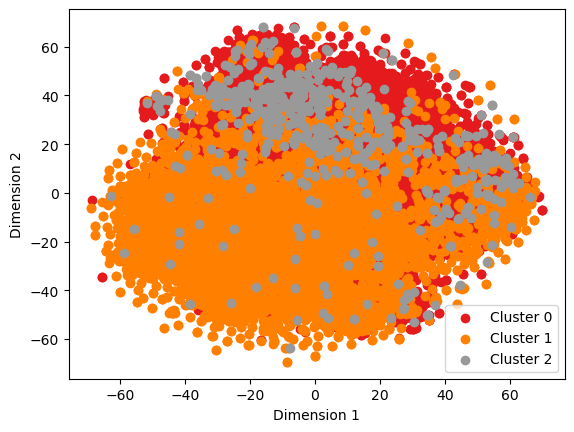

In [25]:
## ؟ points
import matplotlib.pyplot as plt
from typing import List

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color.
    emb_vecs_np = np.array([torch.Tensor(vec).numpy().flatten() for vec in emb_vecs_2d])
    x_values = emb_vecs_np[:, 0]
    y_values = emb_vecs_np[:, 1]
    unique_labels = set(labels)
    num_clusters = len(unique_labels)
    colormap = plt.cm.get_cmap("Set1", num_clusters)
    for i, label in enumerate(unique_labels):
        cluster_indices = [idx for idx, lbl in enumerate(labels) if lbl == label]
        cluster_color = colormap(i)
        print(len(cluster_indices))
        cluster_x_values = x_values[cluster_indices]
        cluster_y_values = y_values[cluster_indices]

        plt.scatter(cluster_x_values, cluster_y_values, color=cluster_color, label=f"Cluster {label}")

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.show()

plot_docs(docs_embedding_2d, labels)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [207]:
import random
from typing import List

def cluster_kmeans(emb_vecs: List, n_clusters: int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors.
    n_clusters : int
        The number of clusters.

    Returns
    -------
    
        Two lists: cluster centers and cluster assignments.
    """
    num_vectors = len(emb_vecs)
    emb_dim = emb_vecs[0].shape[1]
    # Initialize cluster centers randomly
    random.seed(0)
    cluster_centers = [torch.randn(1, emb_dim) for _ in range(n_clusters)]

    # Perform K-means iterations
    num_iterations = 10
    for _ in range(num_iterations):
        # Assign vectors to nearest cluster
        cluster_assignments = []
        for vec in emb_vecs:
            distances = [torch.dist(vec, center) for center in cluster_centers]
            nearest_cluster = torch.argmin(torch.stack(distances))
            cluster_assignments.append(nearest_cluster.item())

        # Update cluster centers
        for cluster in range(n_clusters):
            cluster_indices = [i for i, assignment in enumerate(cluster_assignments) if assignment == cluster]
            if len(cluster_indices) > 0:
                cluster_vectors = [emb_vecs[i] for i in cluster_indices]
                cluster_centers[cluster] = torch.mean(torch.stack(cluster_vectors), dim=0)

    return cluster_centers, cluster_assignments

# Example usage
cluster_centers, cluster_assignments = cluster_kmeans(doc_embeddings, n_clusters=3)


In [208]:
def assign_cluster_labels(cluster_assignments: List[int], labels: List[int]) -> List[int]:
    """Assigns labels to each cluster based on majority category.

    Parameters
    ----------
    cluster_assignments : List[int]
        A list of cluster assignments for each data point.
    labels : List[int]
        A list of labels corresponding to each data point.

    Returns
    -------
    List[int]
        A list of labels for each cluster.
    """
    cluster_labels = []
    unique_clusters = set(cluster_assignments)
    for cluster in unique_clusters:
        cluster_indices = [i for i, assignment in enumerate(cluster_assignments) if assignment == cluster]
        cluster_labels_count = np.bincount([labels[i] for i in cluster_indices])
        majority_label = np.argmax(cluster_labels_count)
        cluster_labels.append(majority_label)
    return cluster_labels

# Example usage
cluster_labels = assign_cluster_labels(cluster_assignments, labels)

/tmp/ipykernel_28/3100076444.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("tab10", num_clusters)


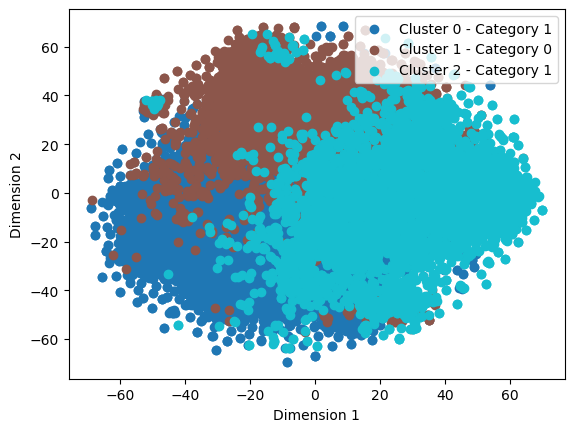

In [209]:
def plot_docs(emb_vecs_2d: List[List[float]], labels: List[int], cluster_assignments: List[int], cluster_labels: List[int]):
    """Draws a 2D plot of input vectors with cluster assignments and labels.

    Parameters
    ----------
    emb_vecs_2d : List[List[float]]
        A list of 2D vectors.
    labels : List[int]
        A list of labels corresponding to each vector.
    cluster_assignments : List[int]
        A list of cluster assignments for each vector.
    cluster_labels : List[int]
        A list of labels for each cluster.

    Returns
    -------
    None
    """
    # Create a color map for different clusters
    unique_clusters = set(cluster_assignments)
    num_clusters = len(unique_clusters)
    colormap = plt.cm.get_cmap("tab10", num_clusters)

    # Plot the vectors
    for i, cluster in enumerate(unique_clusters):
        cluster_indices = [idx for idx, assignment in enumerate(cluster_assignments) if assignment == cluster]
        cluster_vecs = [emb_vecs_2d[idx] for idx in cluster_indices]
        cluster_color = colormap(i)

        x_values = [vec[0] for vec in cluster_vecs]
        y_values = [vec[1] for vec in cluster_vecs]

        plt.scatter(x_values, y_values, color=cluster_color, label=f"Cluster {cluster} - Category {cluster_labels[i]}")

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.show()

# Example usage
plot_docs(docs_embedding_2d, labels, cluster_assignments, cluster_labels)

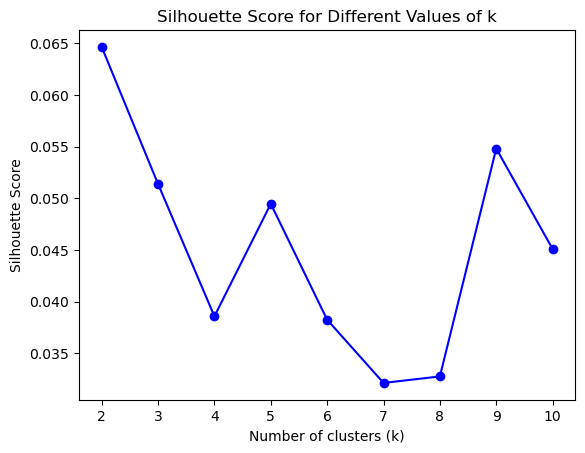

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

def calculate_silhouette_scores(emb_vecs, min_clusters, max_clusters):
    silhouette_scores = []
    emb_vecs_array = torch.cat(emb_vecs, dim=0).numpy()  # Convert the list of tensors to a NumPy array
    
    for n_clusters in range(min_clusters, max_clusters+1):
        cluster_centers, cluster_assignments = cluster_kmeans(emb_vecs, n_clusters)
        unique_labels = len(np.unique(cluster_assignments))
        if unique_labels < 2:
            silhouette_avg = 0
        else:
            silhouette_avg = silhouette_score(emb_vecs_array, cluster_assignments)
        silhouette_scores.append(silhouette_avg)

    return silhouette_scores

# Example usage
min_clusters = 2
max_clusters = 10
silhouette_scores = calculate_silhouette_scores(doc_embeddings, min_clusters, max_clusters)

# Plot the silhouette score graph
k_values = range(min_clusters, max_clusters+1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


باید توجه داشته باشیم که هر چه این معیار بالاتر باشد، الزاما به معنی اینکه باید تعداد خوشه متناظر با آن امتیاز را انتخاب کنیم نیست! و انتخاب تعداد خوشه بهینه به معیار‌های مختلفی وابسته است.  
معمولا تعداد خوشه‌ای مناسب است که تقریبا امتیاز این معیار برای آن بالا باشد و تا حد خوبی نیز پایدار شده باشد به این معنی که با تغییر تعداد خوشه‌ها به مقادیر نزدیک آن، این معیار خیلی جابجا نشود.

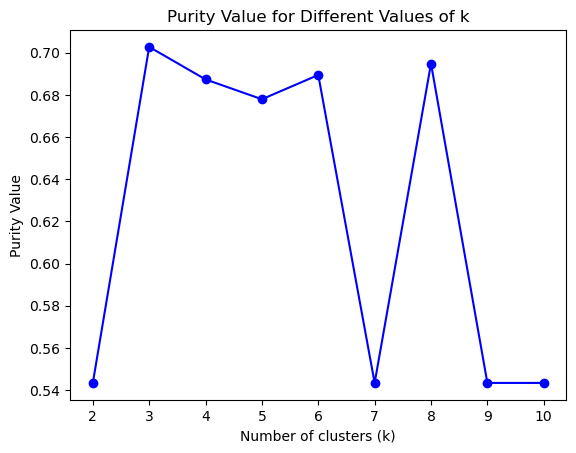

In [211]:
from sklearn.metrics import accuracy_score, confusion_matrix

def calculate_purity(emb_vecs, labels, k):
    cluster_centers, cluster_assignments = cluster_kmeans(emb_vecs, k)
    true_labels = labels  
    
    # Compute confusion matrix
    confusionMatrix = confusion_matrix(true_labels, cluster_assignments)
    
    # Compute purity value
    purity = np.sum(np.amax(confusionMatrix, axis=0)) / np.sum(confusionMatrix)
    
    return purity

def plot_purity_values(emb_vecs, labels, min_clusters, max_clusters):
    purity_values = []

    for n_clusters in range(min_clusters, max_clusters+1):
        purity = calculate_purity(emb_vecs, labels, n_clusters)
        purity_values.append(purity)

    return purity_values

# Example usage
min_clusters = 2
max_clusters = 10
purity_values = plot_purity_values(doc_embeddings, labels, min_clusters, max_clusters)

# Plot the purity value graph
k_values = range(min_clusters, max_clusters+1)
plt.plot(k_values, purity_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Purity Value')
plt.title('Purity Value for Different Values of k')
plt.show()

با توجه به دو نمودار قبل گویا می‌توان گفت ۳ خوشه گزینه خوبی برای تعداد خوشه‌ها می‌باشد. همان طور که واضح است بیشترین خلوص را دارد و معیار silhouette آن نیز امتیاز خوبی دارد. 

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

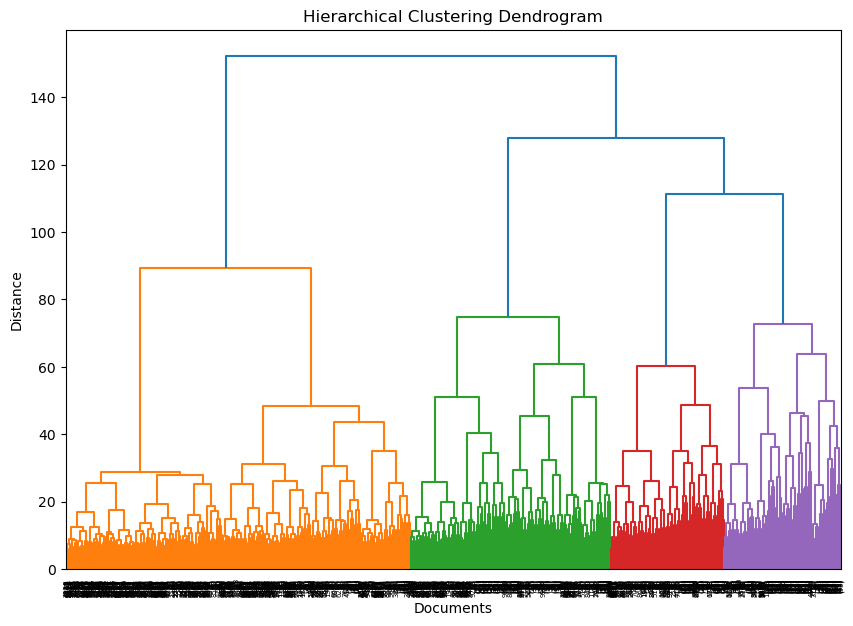

In [157]:
import scipy.cluster.hierarchy as shc
import numpy as np
import matplotlib.pyplot as plt

# Convert doc_embeddings to a NumPy array
doc_embeddings_np = np.array([emb.squeeze().numpy() for emb in doc_embeddings])

# Perform hierarchical clustering
linkage_matrix = shc.linkage(doc_embeddings_np, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(linkage_matrix, truncate_mode='level', p=10)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [159]:
import numpy as np
from typing import List
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_docs(input_doc_index: int, num_of_similar_docs: int, emb_vecs: List):
    """Finds similar documents to the input document in the dataset

    Parameters
    ----------
    input_doc_index : int
        Index of the input document vector in the emb_vecs list

    num_of_similar_docs : int
        Number of similar documents to return

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to the input document, sorted by similarity
    """

    # Convert the input document vector to a numpy array
    input_doc_vec = emb_vecs[input_doc_index].squeeze().numpy()

    # Convert all document vectors to numpy arrays
    emb_vecs_array = np.array([vec.squeeze().numpy() for vec in emb_vecs])

    # Calculate cosine similarities between the input document and all other documents
    similarities = cosine_similarity(input_doc_vec.reshape(1, -1), emb_vecs_array)

    # Get the indices of the most similar documents
    similar_doc_indices = similarities.argsort()[0][-num_of_similar_docs-1:-1][::-1]

    return similar_doc_indices

# Example usage
input_doc_index = 10
num_of_similar_docs = 5
similar_docs = find_similar_docs(input_doc_index, num_of_similar_docs, doc_embeddings)

# Print the indices of similar documents
print(similar_docs)


[ 495 1352 5051 7633 1232]
